In [2]:
import pandas as pd
import numpy as np

In [3]:
bank_p = 'Bank.csv'

In [4]:
bank = pd.read_csv(bank_p, sep = ';', decimal = '.', header=0, names = ['Age', 'Job', 'Marital', 'Education', 'Default','Housing', 'Loan', 'Contact', 'Month', 'day_of_week', 'Duration', 'Campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx','cons_conf_idx', 'euribor3m', 'nr_employed', 'y'])

In [5]:
bank.head(5)

,Age,Job,Marital,Education,Default,Housing,Loan,Contact,Month,day_of_week,...,Campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,30.0,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2.0,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39.0,services,single,high.school,no,no,no,telephone,may,fri,...,4.0,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191,no
2,25.0,services,married,high.school,no,yes,no,telephone,jun,wed,...,1.0,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38.0,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3.0,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47.0,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1.0,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [5]:
bank.dtypes

Age               float64
Job                object
Marital            object
Education          object
Default            object
Housing            object
Loan               object
Contact            object
Month              object
day_of_week        object
Duration          float64
Campaign          float64
pdays              object
previous           object
poutcome           object
emp_var_rate       object
cons_price_idx    float64
cons_conf_idx     float64
euribor3m          object
nr_employed        object
y                  object
dtype: object

In [6]:
bank.columns

Index([u'Age', u'Job', u'Marital', u'Education', u'Default', u'Housing',
       u'Loan', u'Contact', u'Month', u'day_of_week', u'Duration', u'Campaign',
       u'pdays', u'previous', u'poutcome', u'emp_var_rate', u'cons_price_idx',
       u'cons_conf_idx', u'euribor3m', u'nr_employed', u'y'],
      dtype='object')

# Changing Data Type of Columns

In [7]:
bank.pdays = pd.to_numeric(bank.pdays, errors='coerce')

In [8]:
bank.previous = pd.to_numeric(bank.previous, errors='coerce')

In [9]:
bank.emp_var_rate = pd.to_numeric(bank.emp_var_rate, errors='coerce')

In [10]:
bank.euribor3m = pd.to_numeric(bank.euribor3m, errors='coerce')

In [11]:
bank.nr_employed = pd.to_numeric(bank.nr_employed, errors='coerce')

In [12]:
bank.dtypes

Age               float64
Job                object
Marital            object
Education          object
Default            object
Housing            object
Loan               object
Contact            object
Month              object
day_of_week        object
Duration          float64
Campaign          float64
pdays             float64
previous          float64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                  object
dtype: object

# Removing Typos

In [13]:
bank['Job'].value_counts()

admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: Job, dtype: int64

In [14]:
bank['Job'] = bank['Job'].str.replace('admin.','admin')

In [15]:
bank['Job'].value_counts()

admin            1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: Job, dtype: int64

In [16]:
bank['Marital'].value_counts()

married                  2509
single                   1153
divorced                  445
unknown                    11
divorceded”;”basic.9y       1
Name: Marital, dtype: int64

In [17]:
bank['Marital'] = bank['Marital'].str.replace('divorceded”;”basic.9y','divorced')

In [18]:
bank['Marital'].value_counts()

married     2509
single      1153
divorced     446
unknown       11
Name: Marital, dtype: int64

In [19]:
bank['Education'].value_counts()

university.degree      1264
high.school             921
basic.9y                573
professional.course     535
basic.4y                429
basic.6y                227
unknown                 167
no                        1
illiterate                1
basic.6yes”;”no           1
Name: Education, dtype: int64

In [20]:
bank['Education'] = bank['Education'].str.replace('basic.6yes”;”no','basic.6y')

In [21]:
bank['Education'].value_counts()

university.degree      1264
high.school             921
basic.9y                573
professional.course     535
basic.4y                429
basic.6y                228
unknown                 167
no                        1
illiterate                1
Name: Education, dtype: int64

In [22]:
edu_fake = bank[bank['Education'] == 'no']
bank = bank.drop(edu_fake.index, axis = 0)

In [23]:
bank['Education'].value_counts()

university.degree      1264
high.school             921
basic.9y                573
professional.course     535
basic.4y                429
basic.6y                228
unknown                 167
illiterate                1
Name: Education, dtype: int64

In [24]:
bank['Default'].value_counts()

no            3312
unknown        803
yess”;”yes       1
noo”;”yes        1
yes              1
Name: Default, dtype: int64

In [25]:
bank['Default'] = bank['Default'].str.replace('yess”;”yes','yes')

In [26]:
bank['Default'].value_counts()

no           3312
unknown       803
yes             2
noo”;”yes       1
Name: Default, dtype: int64

In [27]:
bank['Default'] = bank['Default'].str.replace('noo”;”yes','no')

In [28]:
bank['Default'].value_counts()

no         3313
unknown     803
yes           2
Name: Default, dtype: int64

In [29]:
bank['Housing'].value_counts()

yes         2173
no          1839
unknown      105
cellular       1
Name: Housing, dtype: int64

In [30]:
hous_fake = bank[bank['Housing'] == 'cellular']
bank = bank.drop(hous_fake.index, axis = 0)

In [31]:
bank['Housing'].value_counts()

yes        2173
no         1839
unknown     105
Name: Housing, dtype: int64

In [32]:
bank['Loan'].value_counts()

no          3348
yes          663
unknown      105
cellular       1
Name: Loan, dtype: int64

In [33]:
l_fake = bank[bank['Loan'] == 'cellular']
bank = bank.drop(l_fake.index, axis = 0)

In [34]:
bank['Loan'].value_counts()

no         3348
yes         663
unknown     105
Name: Loan, dtype: int64

In [35]:
bank['Contact'].value_counts()

cellular     2649
telephone    1467
Name: Contact, dtype: int64

In [36]:
bank['Month'].value_counts()

may    1377
jul     710
aug     635
jun     530
nov     446
apr     215
oct      69
sep      64
mar      48
dec      22
Name: Month, dtype: int64

In [37]:
bank['day_of_week'].value_counts()

thu                            858
mon                            854
tue                            840
wed                            795
fri                            768
thu”;-;1;999;0;nonexistent"      1
Name: day_of_week, dtype: int64

In [38]:
bank['day_of_week'] = bank['day_of_week'].str.replace('thu”;-;1;999;0;nonexistent"','thu')

In [39]:
bank['day_of_week'].value_counts()

thu    859
mon    854
tue    840
wed    795
fri    768
Name: day_of_week, dtype: int64

In [40]:
bank['Duration'].value_counts()

77.0      24
112.0     23
73.0      22
81.0      21
113.0     20
83.0      20
122.0     20
90.0      20
145.0     20
88.0      19
131.0     19
135.0     19
114.0     19
103.0     18
159.0     18
87.0      18
155.0     18
107.0     18
111.0     17
139.0     17
160.0     17
147.0     17
130.0     17
69.0      17
204.0     17
95.0      17
180.0     17
161.0     17
166.0     16
146.0     16
          ..
726.0      1
687.0      1
515.0      1
771.0      1
800.0      1
1009.0     1
1186.0     1
1806.0     1
757.0      1
1207.0     1
1300.0     1
892.0      1
646.0      1
716.0      1
1720.0     1
1128.0     1
823.0      1
1190.0     1
992.0      1
611.0      1
825.0      1
898.0      1
638.0      1
373.0      1
371.0      1
1365.0     1
637.0      1
1590.0     1
449.0      1
457.0      1
Name: Duration, Length: 829, dtype: int64

In [41]:
bank['Campaign'].value_counts()

1.000     1762
2.000     1039
3.000      548
4.000      291
5.000      142
6.000       98
7.000       60
8.000       36
9.000       32
10.000      20
11.000      19
12.000      16
17.000      14
13.000      11
16.000       7
14.000       6
29.000       2
15.000       2
22.000       2
19.000       2
23.000       2
18.000       1
24.000       1
93.994       1
27.000       1
35.000       1
Name: Campaign, dtype: int64

In [42]:
bank['pdays'].value_counts()

 999.0    3955
 3.0        52
 6.0        42
 4.0        14
 7.0        10
 10.0        8
 12.0        5
 5.0         4
 2.0         4
 1.0         3
 9.0         3
 15.0        2
 18.0        2
 0.0         2
 16.0        2
 13.0        2
-36.4        1
 14.0        1
 11.0        1
 17.0        1
 21.0        1
 19.0        1
Name: pdays, dtype: int64

In [43]:
p_fake = bank[bank['pdays'] == -36.4]
bank = bank.drop(p_fake.index, axis = 0)

In [44]:
bank['pdays'].value_counts()

999.0    3955
3.0        52
6.0        42
4.0        14
7.0        10
10.0        8
12.0        5
5.0         4
2.0         4
1.0         3
9.0         3
18.0        2
13.0        2
15.0        2
0.0         2
16.0        2
21.0        1
11.0        1
19.0        1
17.0        1
14.0        1
Name: pdays, dtype: int64

In [45]:
bank['previous'].value_counts()

0.0    3519
1.0     475
2.0      78
3.0      25
4.0      14
6.0       2
5.0       2
Name: previous, dtype: int64

In [46]:
bank['poutcome'].value_counts()

nonexistent    3519
failure         454
success         142
Name: poutcome, dtype: int64

In [47]:
bank['emp_var_rate'].value_counts()

 1.4    1624
-1.8     882
 1.1     757
-0.1     392
-2.9     164
-3.4     104
-1.7      87
-1.1      83
-3.0      21
-0.2       1
Name: emp_var_rate, dtype: int64

In [48]:
bank['cons_price_idx'].value_counts()

93.994    755
93.918    665
92.893    596
93.444    527
94.465    431
93.200    386
93.075    201
92.201     75
92.963     75
92.431     43
94.199     39
92.649     36
94.027     33
94.215     30
92.379     25
92.843     25
94.767     24
94.055     24
93.876     23
93.369     23
92.713     21
94.601     20
93.749     14
92.469     14
93.798      6
92.756      1
Name: cons_price_idx, dtype: int64

In [49]:
bank['cons_conf_idx'].value_counts()

-36.4    757
-42.7    666
-46.2    596
-36.1    527
-41.8    431
-42.0    386
-47.1    201
-31.4     75
-40.8     75
-26.9     43
-37.5     39
-30.1     36
-38.3     33
-40.3     30
-50.0     25
-29.8     25
-50.8     24
-39.8     24
-34.8     23
-40.0     23
-33.0     21
-49.5     20
-33.6     14
-34.6     14
-40.4      6
-45.9      1
Name: cons_conf_idx, dtype: int64

In [50]:
bank['euribor3m'].value_counts()

4.857    274
4.963    255
4.962    236
4.961    212
4.856    138
4.965    114
4.964    110
1.405    106
4.960    105
4.968    101
4.076    100
4.864     97
4.120     82
4.855     81
4.860     80
4.859     76
4.959     76
4.191     73
4.966     72
1.266     71
1.281     68
4.858     66
4.958     66
4.153     64
4.967     62
4.021     61
1.299     59
1.327     58
1.334     58
1.250     54
        ... 
1.520      1
0.721      1
4.245      1
1.687      1
1.531      1
4.663      1
0.937      1
0.672      1
0.829      1
0.640      1
1.044      1
1.602      1
0.709      1
0.755      1
0.996      1
0.885      1
1.043      1
0.752      1
0.778      1
3.853      1
0.707      1
4.592      1
0.965      1
1.085      1
1.538      1
1.046      1
0.710      1
0.650      1
1.778      1
1.224      1
Name: euribor3m, Length: 234, dtype: int64

In [51]:
bank['nr_employed'].value_counts()

5228.1    1624
5099.1     821
5191.0     757
5195.8     392
5076.2     164
5017.5     104
4991.6      87
4963.6      83
5008.7      59
5023.5      21
5176.3       1
Name: nr_employed, dtype: int64

In [52]:
bank['y'].value_counts()

no     3664
yes     451
Name: y, dtype: int64

# Remove Whitespace

In [53]:
bank['Job'] = bank['Job'].str.strip()
bank['Marital'] = bank['Marital'].str.strip() 
bank['Education'] = bank['Education'].str.strip() 
bank['Default'] = bank['Default'].str.strip()
bank['Housing'] = bank['Housing'].str.strip()
bank['Loan'] = bank['Loan'].str.strip()
bank['Contact'] = bank['Contact'].str.strip()
bank['Month'] = bank['Month'].str.strip()
bank['day_of_week'] = bank['day_of_week'].str.strip() 
bank['poutcome'] = bank['poutcome'].str.strip()
bank['y'] = bank['y'].str.strip() 

# Lower Case

In [54]:
bank['Job'] = bank['Job'].str.lower()
bank['Marital'] = bank['Marital'].str.lower() 
bank['Education'] = bank['Education'].str.lower() 
bank['Default'] = bank['Default'].str.lower()
bank['Housing'] = bank['Housing'].str.lower()
bank['Loan'] = bank['Loan'].str.lower()
bank['Contact'] = bank['Contact'].str.lower()
bank['Month'] = bank['Month'].str.lower()
bank['day_of_week'] = bank['day_of_week'].str.lower() 
bank['poutcome'] = bank['poutcome'].str.lower()
bank['y'] = bank['y'].str.lower()  

In [55]:
bankcopy1 = bank.copy()

In [56]:
bankcopy2 = bank.copy()

In [57]:
bankcopy3 = bank.copy()

# Sanity Check for impossible values of Age

In [58]:
age = bank[bank.Age>120]

In [59]:
age

,Age,Job,Marital,Education,Default,Housing,Loan,Contact,Month,day_of_week,...,Campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
385,143.0,unemployed,married,basic.4y,no,no,no,cellular,may,wed,...,2.0,999.0,0.0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,no
394,250.0,admin,married,basic.9y,no,no,no,cellular,aug,thu,...,1.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,no


In [60]:
bank = bank.drop(age.index, axis = 0)

In [61]:
bank[bank.Age>120]

,Age,Job,Marital,Education,Default,Housing,Loan,Contact,Month,day_of_week,...,Campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y


# Sanity Check - Duration =0 --> y = no

In [62]:
bank.loc[bank['Duration'] == 0]

,Age,Job,Marital,Education,Default,Housing,Loan,Contact,Month,day_of_week,...,Campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
1950,39.0,admin,married,high.school,no,yes,no,telephone,may,tue,...,4.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Q 7 - Replacing missing values with column-wise mean

In [63]:
bank.isnull().sum()

Age               3
Job               0
Marital           0
Education         0
Default           0
Housing           0
Loan              0
Contact           0
Month             0
day_of_week       0
Duration          0
Campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    3
cons_conf_idx     0
euribor3m         2
nr_employed       2
y                 0
dtype: int64

In [64]:
bank.loc[bank['Age'].isnull()]

,Age,Job,Marital,Education,Default,Housing,Loan,Contact,Month,day_of_week,...,Campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
36,NaN,blue-collar,married,basic.6y,no,yes,no,telephone,may,wed,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
433,NaN,admin,single,university.degree,no,yes,no,cellular,aug,thu,...,1.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
538,NaN,management,married,high.school,no,yes,no,cellular,aug,wed,...,1.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no


In [65]:
bank['Age'].mean()

40.11265206812652

In [66]:
bank['Age'].fillna(bank['Age'].mean(axis=0),inplace=True)

In [67]:
bank.iloc[[36,431,536]]

,Age,Job,Marital,Education,Default,Housing,Loan,Contact,Month,day_of_week,...,Campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
36,40.112652,blue-collar,married,basic.6y,no,yes,no,telephone,may,wed,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
433,40.112652,admin,single,university.degree,no,yes,no,cellular,aug,thu,...,1.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
538,40.112652,management,married,high.school,no,yes,no,cellular,aug,wed,...,1.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no


In [68]:
bank.loc[bank['cons_price_idx'].isnull()]

,Age,Job,Marital,Education,Default,Housing,Loan,Contact,Month,day_of_week,...,Campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
77,38.0,self-employed,single,university.degree,no,no,no,telephone,may,thu,...,2.0,999.0,0.0,nonexistent,1.1,NaN,-36.4,4.855,5191.0,no
249,44.0,admin,married,high.school,no,no,no,telephone,may,wed,...,3.0,999.0,0.0,nonexistent,1.1,NaN,-36.4,4.856,5191.0,no
303,24.0,admin,single,high.school,unknown,yes,no,telephone,jul,thu,...,1.0,999.0,0.0,nonexistent,1.4,NaN,-42.7,4.958,5228.1,no


In [69]:
bank['cons_price_idx'].mean()

93.57963746958937

In [70]:
bank['cons_price_idx'].fillna(bank['cons_price_idx'].mean(axis=0),inplace=True)

In [71]:
bank.iloc[[77,249,303]]

,Age,Job,Marital,Education,Default,Housing,Loan,Contact,Month,day_of_week,...,Campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
77,38.0,self-employed,single,university.degree,no,no,no,telephone,may,thu,...,2.0,999.0,0.0,nonexistent,1.1,93.579637,-36.4,4.855,5191.0,no
249,44.0,admin,married,high.school,no,no,no,telephone,may,wed,...,3.0,999.0,0.0,nonexistent,1.1,93.579637,-36.4,4.856,5191.0,no
303,24.0,admin,single,high.school,unknown,yes,no,telephone,jul,thu,...,1.0,999.0,0.0,nonexistent,1.4,93.579637,-42.7,4.958,5228.1,no


In [72]:
bank.loc[bank['euribor3m'].isnull()]

,Age,Job,Marital,Education,Default,Housing,Loan,Contact,Month,day_of_week,...,Campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
44,32.0,housemaid,married,basic.4y,no,yes,yes,cellular,may,fri,...,1.0,999.0,0.0,nonexistent,-1.8,92.893,-46.2,NaN,5099.1,no
193,47.0,services,single,basic.9y,no,no,no,cellular,nov,tue,...,2.0,999.0,0.0,nonexistent,-0.1,93.200,-42.0,NaN,5195.8,no


In [73]:
bank['euribor3m'].mean()

3.6216222330333183

In [74]:
bank['euribor3m'].fillna(bank['euribor3m'].mean(axis=0),inplace=True)

In [75]:
bank.iloc[[44,193]]

,Age,Job,Marital,Education,Default,Housing,Loan,Contact,Month,day_of_week,...,Campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
44,32.0,housemaid,married,basic.4y,no,yes,yes,cellular,may,fri,...,1.0,999.0,0.0,nonexistent,-1.8,92.893,-46.2,3.621622,5099.1,no
193,47.0,services,single,basic.9y,no,no,no,cellular,nov,tue,...,2.0,999.0,0.0,nonexistent,-0.1,93.200,-42.0,3.621622,5195.8,no


In [76]:
bank.loc[bank['nr_employed'].isnull()]

,Age,Job,Marital,Education,Default,Housing,Loan,Contact,Month,day_of_week,...,Campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
21,39.0,technician,divorced,high.school,no,no,no,cellular,mar,mon,...,1.0,12.0,2.0,success,-1.8,93.369,-34.8,0.639,NaN,yes
30,38.0,technician,married,university.degree,no,yes,yes,cellular,mar,tue,...,1.0,999.0,1.0,failure,-1.8,92.843,-50.0,1.687,NaN,no


In [77]:
bank['nr_employed'].mean()

5166.51831671134

In [78]:
bank['nr_employed'].fillna(bank['nr_employed'].mean(axis=0),inplace=True)

In [79]:
bank.iloc[[21,30]]

,Age,Job,Marital,Education,Default,Housing,Loan,Contact,Month,day_of_week,...,Campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
21,39.0,technician,divorced,high.school,no,no,no,cellular,mar,mon,...,1.0,12.0,2.0,success,-1.8,93.369,-34.8,0.639,5166.518317,yes
30,38.0,technician,married,university.degree,no,yes,yes,cellular,mar,tue,...,1.0,999.0,1.0,failure,-1.8,92.843,-50.0,1.687,5166.518317,no


## Saving cleaned data in csv file (This file is used in TASK 2)

In [80]:
bank.to_csv('clean_bank_data.csv', index = False)

# Extension - Analysis of Missing Values

### Replacing missing values with fixed value

In [81]:
bankcopy1.loc[bankcopy1['Age'].isnull()]

,Age,Job,Marital,Education,Default,Housing,Loan,Contact,Month,day_of_week,...,Campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
36,NaN,blue-collar,married,basic.6y,no,yes,no,telephone,may,wed,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
433,NaN,admin,single,university.degree,no,yes,no,cellular,aug,thu,...,1.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
538,NaN,management,married,high.school,no,yes,no,cellular,aug,wed,...,1.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no


In [82]:
bankcopy1['Age'].fillna(0,inplace=True)

In [83]:
bankcopy1.iloc[[36,433,538]]

,Age,Job,Marital,Education,Default,Housing,Loan,Contact,Month,day_of_week,...,Campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
36,0.0,blue-collar,married,basic.6y,no,yes,no,telephone,may,wed,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
433,0.0,admin,single,university.degree,no,yes,no,cellular,aug,thu,...,1.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
538,0.0,management,married,high.school,no,yes,no,cellular,aug,wed,...,1.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no


### Replacing missing values with column-wise median value

In [84]:
bankcopy2.loc[bankcopy2['Age'].isnull()]

,Age,Job,Marital,Education,Default,Housing,Loan,Contact,Month,day_of_week,...,Campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
36,NaN,blue-collar,married,basic.6y,no,yes,no,telephone,may,wed,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
433,NaN,admin,single,university.degree,no,yes,no,cellular,aug,thu,...,1.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
538,NaN,management,married,high.school,no,yes,no,cellular,aug,wed,...,1.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no


In [85]:
bankcopy2['Age'].median()

38.0

In [86]:
bankcopy2['Age'].fillna(bank['Age'].median(axis=0), inplace=True)

In [87]:
bankcopy2.iloc[[36,433,538]]

,Age,Job,Marital,Education,Default,Housing,Loan,Contact,Month,day_of_week,...,Campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
36,38.0,blue-collar,married,basic.6y,no,yes,no,telephone,may,wed,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
433,38.0,admin,single,university.degree,no,yes,no,cellular,aug,thu,...,1.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
538,38.0,management,married,high.school,no,yes,no,cellular,aug,wed,...,1.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no


### Ignoring all the observations of missing values

In [88]:
bankcopy3.loc[bankcopy3['Age'].isnull()]

,Age,Job,Marital,Education,Default,Housing,Loan,Contact,Month,day_of_week,...,Campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
36,NaN,blue-collar,married,basic.6y,no,yes,no,telephone,may,wed,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
433,NaN,admin,single,university.degree,no,yes,no,cellular,aug,thu,...,1.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
538,NaN,management,married,high.school,no,yes,no,cellular,aug,wed,...,1.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no


In [89]:
import matplotlib.pyplot as plt

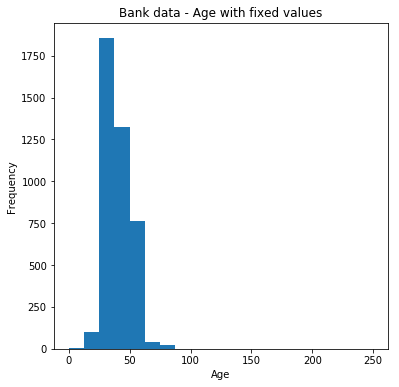

In [90]:
bankcopy1['Age'].plot(kind='hist',bins=20, figsize=(6,6))
plt.title('Bank data - Age with fixed values')
plt.xlabel('Age')
plt.show()

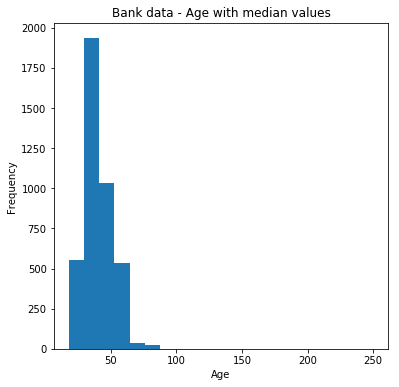

In [91]:
bankcopy2['Age'].plot(kind='hist',bins=20, figsize=(6,6))
plt.title('Bank data - Age with median values')
plt.xlabel('Age')
plt.show()

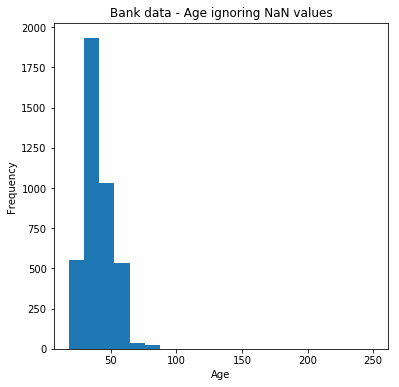

In [92]:
bankcopy3['Age'].dropna().plot(kind='hist',bins=20, figsize=(6,6))
plt.title('Bank data - Age ignoring NaN values')
plt.xlabel('Age')
plt.show()